Imports

In [1]:
import kagglehub
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

Load Dataset

In [2]:
path = kagglehub.dataset_download("ankushpanday2/colorectal-cancer-global-dataset-and-predictions")

print("Path to dataset files:", path)
df=pd.read_csv(path + "/colorectal_cancer_dataset.csv")

100%|██████████| 3.93M/3.93M [00:00<00:00, 5.78MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ankushpanday2/colorectal-cancer-global-dataset-and-predictions/versions/1


In [3]:
np.random.seed(42)

columns = ['Age','Tumor_Size_mm','Family_History','Smoking_History','Alcohol_Consumption','Obesity_BMI','Cancer_Stage','Survival_Prediction']
df=df[[col for col in columns if col in df.columns]].copy()

print("Synthetic Dataset Sample:")
print(df.head())



Synthetic Dataset Sample:
   Age  Tumor_Size_mm Family_History Smoking_History Alcohol_Consumption  \
0   77             69             No              No                 Yes   
1   59             33             No              No                  No   
2   66             17             No             Yes                  No   
3   83             14             No              No                  No   
4   66             34             No             Yes                  No   

  Obesity_BMI Cancer_Stage Survival_Prediction  
0  Overweight    Localized                 Yes  
1  Overweight    Localized                 Yes  
2      Normal     Regional                  No  
3       Obese     Regional                 Yes  
4      Normal    Localized                 Yes  


In [12]:
df_yes = df[df['Survival_Prediction'] == 'Yes'].sample(8563)
df_no = df[df['Survival_Prediction'] == 'No'].sample(3335)
df_sampled = pd.concat([df_yes, df_no]).reset_index(drop=True)

print("\nSampled Dataset Shape (60% Yes or 40% No):",df_sampled.shape)
print("Class Distribution:")
print(df_sampled['Survival_Prediction'].value_counts(normalize=True))



Sampled Dataset Shape (60% Yes or 40% No): (11898, 8)
Class Distribution:
Survival_Prediction
Yes    0.719701
No     0.280299
Name: proportion, dtype: float64


Data Preprocessing - Encoding Categorical Variables


Encode binary categoricals with LabelEncoder

In [13]:
le = LabelEncoder()

df_sampled['Family_History'] = le.fit_transform(df_sampled['Family_History'])
df_sampled['Smoking_History'] = le.fit_transform(df_sampled['Smoking_History'])
df_sampled['Alcohol_Consumption'] = le.fit_transform(df_sampled['Alcohol_Consumption'])
df_sampled['Cancer_Stage'] = le.fit_transform(df_sampled['Cancer_Stage'])
df_sampled['Survival_Prediction'] = le.fit_transform(df_sampled['Survival_Prediction'])

# one-hot encode (multi - category)
df_sampled = pd.get_dummies(df_sampled, columns=['Obesity_BMI'], drop_first=True)

print("\nEncoded Dataset Sample:")
print(df_sampled.head())


X = df_sampled.drop('Survival_Prediction',axis=1)
y = df_sampled['Survival_Prediction']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

print("\nTrain Shape:",X_train.shape)
print("Test Shape:",X_test.shape)



Encoded Dataset Sample:
   Age  Tumor_Size_mm  Family_History  Smoking_History  Alcohol_Consumption  \
0   75             36               1                1                    0   
1   88             31               0                1                    0   
2   73             74               1                0                    1   
3   78             54               1                0                    0   
4   74             36               0                0                    0   

   Cancer_Stage  Survival_Prediction  Obesity_BMI_Obese  \
0             1                    1               True   
1             1                    1               True   
2             0                    1              False   
3             1                    1               True   
4             2                    1              False   

   Obesity_BMI_Overweight  
0                   False  
1                   False  
2                   False  
3                   False  
4    

Feature Scaling


Scaled Train Sample:
[[ 1.32353437e+00 -6.76641780e-01 -6.48861465e-01  1.21466976e+00
  -1.01738155e+00 -1.11939154e+00 -6.49842502e-01 -8.10931926e-01]
 [ 1.15652322e+00  1.20798533e+00 -6.48861465e-01 -8.23269034e-01
   9.82915409e-01  1.17731546e-03 -6.49842502e-01 -8.10931926e-01]]


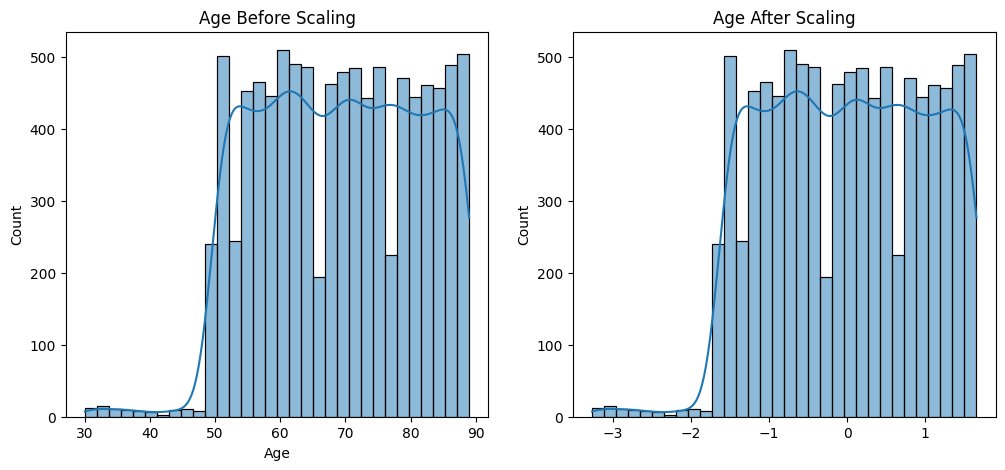

In [14]:
scaler=StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nScaled Train Sample:")
print(X_train_scaled[:2])

fig,ax =plt.subplots(1,2,figsize=(12,5))
sns.histplot(X_train['Age'],ax=ax[0],kde=True).set_title('Age Before Scaling')
sns.histplot(X_train_scaled[:,0],ax=ax[1],kde=True).set_title('Age After Scaling')
plt.show()

Basic SVM with Linear Kernel


Linear SVM Accuracy: 0.7197478991596639
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       667
           1       0.72      1.00      0.84      1713

    accuracy                           0.72      2380
   macro avg       0.36      0.50      0.42      2380
weighted avg       0.52      0.72      0.60      2380

Confusion Matrix:
 [[   0  667]
 [   0 1713]]
Number of Support Vectors: 5352


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


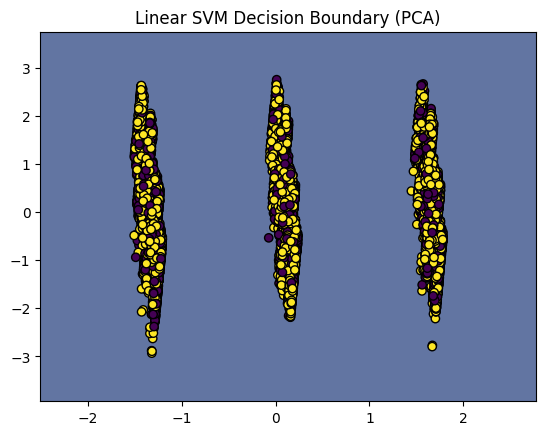

In [15]:
svm_linear =SVC(kernel='linear',random_state=42)
svm_linear.fit(X_train_scaled,y_train)

y_pred_linear =svm_linear.predict(X_test_scaled)
acc_linear =accuracy_score(y_test,y_pred_linear)
print("\nLinear SVM Accuracy:",acc_linear)
print("Classification Report:\n",classification_report(y_test, y_pred_linear))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_linear))

print("Number of Support Vectors:",len(svm_linear.support_vectors_))

pca =PCA(n_components=2)
X_train_pca =pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)

svm_linear_pca = SVC(kernel='linear',random_state=42)
svm_linear_pca.fit(X_train_pca,y_train)

# plotting decision boundary
def plot_decision_boundary(clf,X,y,title):
    x_min,x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min,y_max = X[:,1].min()-1, X[:,1].max()+1
    xx,yy =np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
    Z =clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z =Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,alpha=0.8)
    plt.scatter(X[:,0],X[:,1],c=y,edgecolors='k')
    plt.title(title)
    plt.show()

plot_decision_boundary(svm_linear_pca,X_train_pca,y_train,"Linear SVM Decision Boundary (PCA)")

Kernel Trick - Polynomial Kernel


Polynomial SVM ( degree=2 ) Accuracy :  0.7197478991596639
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       667
           1       0.72      1.00      0.84      1713

    accuracy                           0.72      2380
   macro avg       0.36      0.50      0.42      2380
weighted avg       0.52      0.72      0.60      2380

Number of Support Vectors: 5435


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


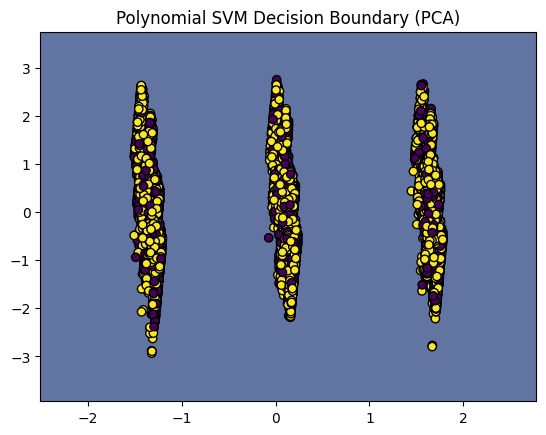

In [16]:
svm_poly = SVC(kernel='poly',degree=2,coef0=1,random_state=42)
svm_poly.fit(X_train_scaled, y_train)


y_pred_poly= svm_poly.predict(X_test_scaled)
acc_poly = accuracy_score(y_test,y_pred_poly)
print("\nPolynomial SVM ( degree=2 ) Accuracy : ", acc_poly)
print("Classification Report:\n",classification_report(y_test,y_pred_poly))
print("Number of Support Vectors:",len(svm_poly.support_vectors_))


svm_poly_pca = SVC(kernel='poly',degree=2,coef0=1,random_state=42)
svm_poly_pca.fit(X_train_pca,y_train)
plot_decision_boundary(svm_poly_pca,X_train_pca,y_train,"Polynomial SVM Decision Boundary (PCA)")

# Kernel Trick => Gaussian (RBF) Kernel


RBF SVM Accuracy: 0.7197478991596639
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       667
           1       0.72      1.00      0.84      1713

    accuracy                           0.72      2380
   macro avg       0.36      0.50      0.42      2380
weighted avg       0.52      0.72      0.60      2380

Number of Support Vectors: 6629


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


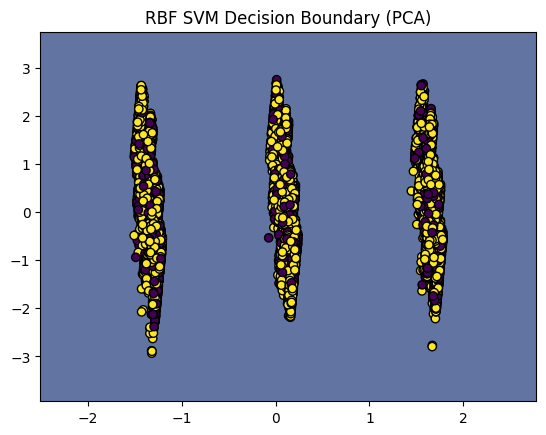

In [17]:
# training SVM with RBF kernel ( gamma='scale' default, sigma related )
svm_rbf = SVC(kernel='rbf',random_state=42)
svm_rbf.fit(X_train_scaled,y_train)


y_pred_rbf = svm_rbf.predict(X_test_scaled)
acc_rbf = accuracy_score(y_test,y_pred_rbf)
print("\nRBF SVM Accuracy:",acc_rbf)
print("Classification Report:\n",classification_report(y_test,y_pred_rbf))


print("Number of Support Vectors:",len(svm_rbf.support_vectors_))


svm_rbf_pca=SVC(kernel='rbf',random_state=42)
svm_rbf_pca.fit(X_train_pca,y_train)
plot_decision_boundary(svm_rbf_pca,X_train_pca,y_train,"RBF SVM Decision Boundary (PCA)")

Regularization ( Varying C Parameter )


RBF SVM with C=0.1 Accuracy:0.7197478991596639
Number of Support Vectors :  6176

RBF SVM with C=1 Accuracy:0.7197478991596639
Number of Support Vectors :  6629

RBF SVM with C=10 Accuracy:0.7197478991596639
Number of Support Vectors :  6532

RBF SVM with C=100 Accuracy:0.7134453781512605
Number of Support Vectors :  6145


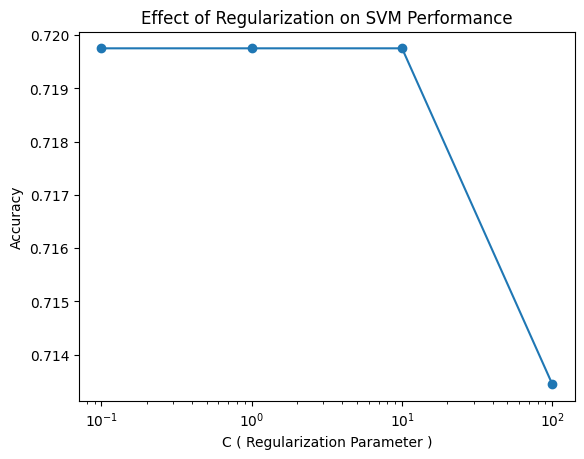

In [18]:
# test different C values -> small C ( large margin,tolerate errors ), large C ( small margin,fit tightly )
C_values = [0.1,1,10,100]
acc_scores = []

for C in C_values:
    svm_reg = SVC(kernel='rbf',C=C,random_state=42)
    svm_reg.fit(X_train_scaled,y_train)
    y_pred=svm_reg.predict(X_test_scaled)
    acc=accuracy_score(y_test,y_pred)
    acc_scores.append(acc)
    print(f"\nRBF SVM with C={C} Accuracy:{acc}")
    print("Number of Support Vectors : ",len(svm_reg.support_vectors_))

# plotting accuracy vs C
plt.plot(C_values,acc_scores,marker='o')
plt.xscale('log')
plt.xlabel('C ( Regularization Parameter )')
plt.ylabel('Accuracy')
plt.title('Effect of Regularization on SVM Performance')
plt.show()

## Findings

- Feature scaling improved the feature distributions which is important for models like SVM.

- A linear kernel gave a simple separation between classes, similar to logistic regression but with margin maximization.

- A polynomial kernel allowed the model to create curved decision boundaries by mapping the data into a higher dimensional space.

- An RBF kernel captured complex non-linear patterns effectively, giving the model more flexibility.

- A lower C value encouraged larger margins ( more support vectors ), which can lead to underfitting, while a higher c reduced training errors but increased the risk of overfitting.

- Decision boundary visualizations clearly showed how different kernels shape the classification regions.

- On this synthetic cancer dataset, the RBF kernel with a moderate C gave the best performance for predicting 5 year survival.
